In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import Lasso
from sklearn import metrics

In [6]:
car_dataset = pd.read_csv(r"C:\Users\lohia\Downloads\car data.csv")

In [7]:
car_dataset.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [8]:
# cheaking number of row and columns
car_dataset.shape

(301, 9)

In [9]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# cheaking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# number of values for categorical values 
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
#encoding the categorical data 
# we have label encoding categorical value replace the 1  and 0 
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [13]:
car_dataset.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0


In [14]:
#splitting our original data into train and test
x = car_dataset.drop(columns=['Car_Name','Selling_Price'],axis=1)  
y = car_dataset['Selling_Price']

In [15]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)  # 0.1 means 10% in test data and 90% in train 

In [18]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


In [19]:
print(y.shape,y_train.shape,y_test.shape)

(301,) (270,) (31,)


### Linear Regression

In [20]:
linear_regression = LinearRegression()

In [21]:
#traning the linear_regression  machine model
linear_regression.fit(x_train,y_train)

LinearRegression()

In [22]:
# prediction on tranning data 
x_train_prediciton = linear_regression.predict(x_train)

In [23]:
# Assuming y_train and x_train_prediction are defined
error_score = metrics.r2_score(y_train, x_train_prediciton)

In [24]:
print("R squared Error:",error_score)

R squared Error: 0.8799451660493705


In [25]:
### Visualize the actucal price and predicted price 

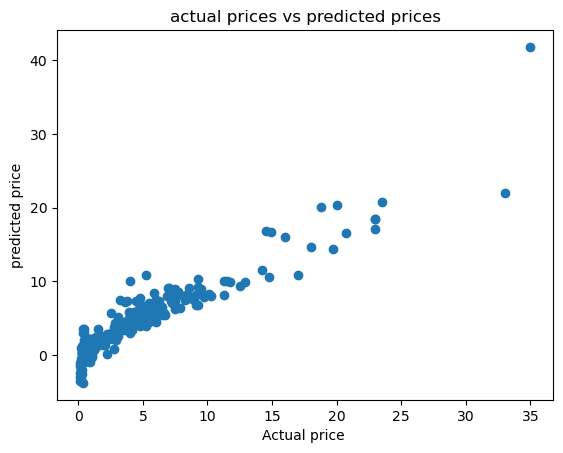

In [26]:
plt.scatter(y_train,x_train_prediciton)
plt.xlabel("Actual price ")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [27]:
## Evaluate the test model

In [28]:
# prediction on test data 
test_data_prediciton = linear_regression.predict(x_test)

In [29]:
# Assuming y_train and x_train_prediction are defined
error_score = metrics.r2_score(y_test, test_data_prediciton)
print("R squared Error:",error_score)

R squared Error: 0.836576671502687


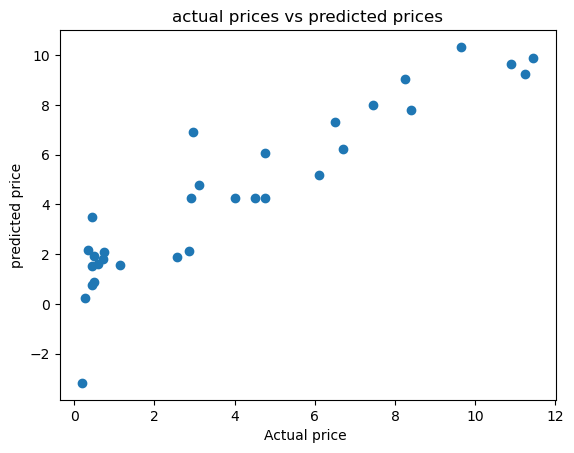

In [30]:
plt.scatter(y_test,test_data_prediciton)
plt.xlabel("Actual price ")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [31]:
input_data = (2017,9.85,6900,0,0,0,0)

#changing the input_data type list to numpy array 
input_data_as_numpy_array = np.array(input_data)

#reshape the np as we are predicting for one instance 
input_data_reshape= input_data_as_numpy_array.reshape(1,-1)

prediction = linear_regression.predict(input_data_reshape)

print(prediction)


[7.07156998]


C:\Users\lohia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
## Lasso Regression 
lass_reg_model = Lasso()

In [33]:
#traning the linear_regression  machine model
lass_reg_model.fit(x_train,y_train)

Lasso()

In [34]:
Traning_data_prediction =lass_reg_model.predict(x_train)

In [35]:
# Assuming y_train and x_train_prediction are defined
error_score1 = metrics.r2_score(y_train, Traning_data_prediction)
print("R squared Error:",error_score1)

R squared Error: 0.8427856123435794


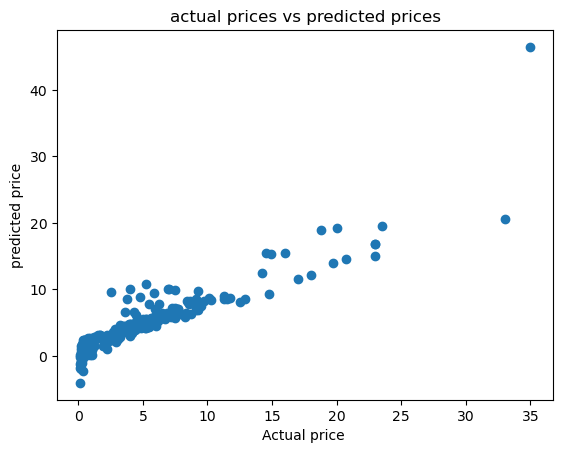

In [36]:
plt.scatter(y_train,Traning_data_prediction)
plt.xlabel("Actual price ")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [37]:
# prediction on test data 
test_data_prediciton = lass_reg_model.predict(x_test)## Evaluate the test model

In [38]:
# Assuming y_train and x_train_prediction are defined
error_score = metrics.r2_score(y_test, test_data_prediciton)
print("R squared Error:",error_score)

R squared Error: 0.8709167941173195


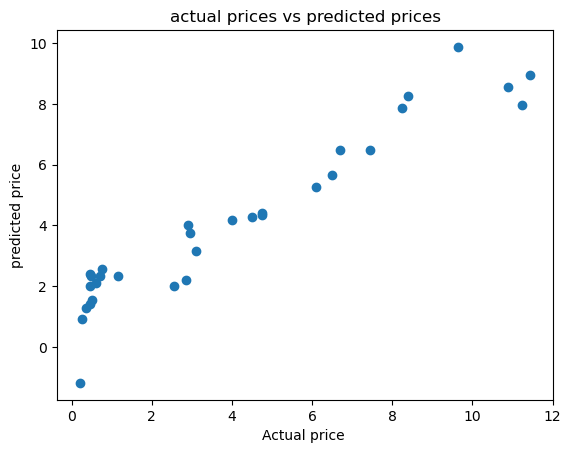

In [39]:
plt.scatter(y_test,test_data_prediciton)
plt.xlabel("Actual price ")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [40]:
input_data = (2017,9.85,6900,0,0,0,0)

#changing the input_data type list to numpy array 
input_data_as_numpy_array = np.array(input_data)

#reshape the np as we are predicting for one instance 
input_data_reshape= input_data_as_numpy_array.reshape(1,-1)

prediction = lass_reg_model.predict(input_data_reshape)

print(prediction)

[7.16105963]


C:\Users\lohia\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
